In [1]:

from pyentrp import entropy as ent
import numpy as np
import pandas as pd

from __future__ import unicode_literals

import unittest

In [2]:
#reading the csv file
alldata= pd.read_csv("./SP.csv")
alldata.head()

# trying with the first 200 data
data = alldata.head(200)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    200 non-null    object 
 1   time    200 non-null    object 
 2   price   200 non-null    float64
 3   volume  200 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB


In [4]:
#setting the date column as the index column 

#data.set_index('date', inplace=True)

#data.index.name = 'date'

In [5]:
#calculating the average price 

data['average_price'] = data.mean(axis=1)

/var/folders/3t/s_7fs8dj7j72z8l07wyyxjpr0000gn/T/ipykernel_78996/2230851832.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['average_price'] = data.mean(axis=1)
/var/folders/3t/s_7fs8dj7j72z8l07wyyxjpr0000gn/T/ipykernel_78996/2230851832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['average_price'] = data.mean(axis=1)


In [6]:
#viewing the new data


data.head()
df = pd.DataFrame(data, columns =["date", "time", "price", "volume", "average_price","SMA"])
df

,date,time,price,volume,average_price,SMA
0,01/03/2000,08:30:34.000,1496.4,0,748.20,NaN
1,01/03/2000,08:30:36.000,1496.0,0,748.00,NaN
2,01/03/2000,08:30:37.000,1495.5,0,747.75,NaN
3,01/03/2000,08:30:46.000,1495.0,0,747.50,NaN
4,01/03/2000,08:30:53.000,1495.5,0,747.75,NaN
...,...,...,...,...,...,...
195,01/03/2000,08:47:05.000,1487.0,0,743.50,NaN
196,01/03/2000,08:47:10.000,1487.5,0,743.75,NaN
197,01/03/2000,08:47:17.000,1487.3,0,743.65,NaN
198,01/03/2000,08:47:17.000,1487.0,0,743.50,NaN


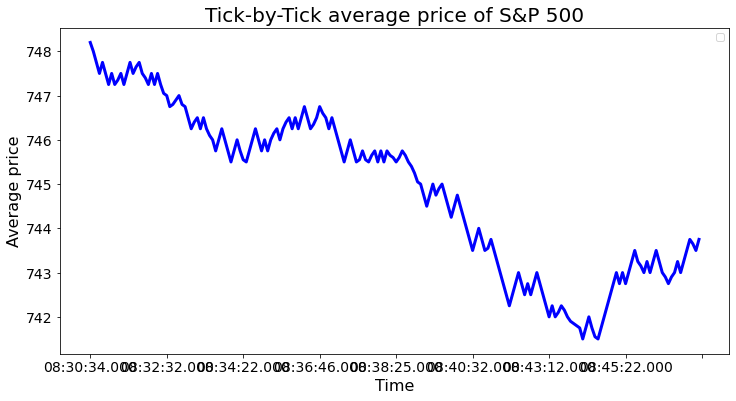

In [7]:
#visualizing the time series using line plots

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-bright')
# line plot - the average price
df.plot(x = "time", y = "average_price", color='blue', linewidth=3, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('Tick-by-Tick average price of S&P 500', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Average price', fontsize=16)

plt.show()


In [8]:
#calculating simple moving average witha window size of 3 and a minimum number of periods of 1 and assigning it to the SMA field
df['SMA'] =  df.rolling(3, min_periods=1).mean()['average_price']
print(df)



           date          time   price  volume  average_price         SMA
0    01/03/2000  08:30:34.000  1496.4       0         748.20  748.200000
1    01/03/2000  08:30:36.000  1496.0       0         748.00  748.100000
2    01/03/2000  08:30:37.000  1495.5       0         747.75  747.983333
3    01/03/2000  08:30:46.000  1495.0       0         747.50  747.750000
4    01/03/2000  08:30:53.000  1495.5       0         747.75  747.666667
..          ...           ...     ...     ...            ...         ...
195  01/03/2000  08:47:05.000  1487.0       0         743.50  743.250000
196  01/03/2000  08:47:10.000  1487.5       0         743.75  743.500000
197  01/03/2000  08:47:17.000  1487.3       0         743.65  743.633333
198  01/03/2000  08:47:17.000  1487.0       0         743.50  743.633333
199  01/03/2000  08:47:24.000  1487.5       0         743.75  743.633333

[200 rows x 6 columns]


In [9]:
#display all column names of DataFrame
#print(SMA.columns.tolist())

In [10]:
#print(SMA_df['date'])
#type(SMA_df['date'])
#type(SMA_df['price'])

#changing the date data series to df 
#my_series = pd.Series(SMA_df['date'])

#date_df = my_series.to_frame()
#date_df = df.rename(columns = {0:'date'})

#print(df)
#print(type(df))
# the daily simple moving average for periods of t =
#data['SMA_10'] = data.average_price.rolling(10, min_periods=1).mean()
#print(SMA.index)

0      748.20
1      748.00
2      747.75
3      747.50
4      747.75
        ...  
195    743.50
196    743.75
197    743.65
198    743.50
199    743.75
Name: average_price, Length: 200, dtype: float64


Text(0.5, 0, 'Index')

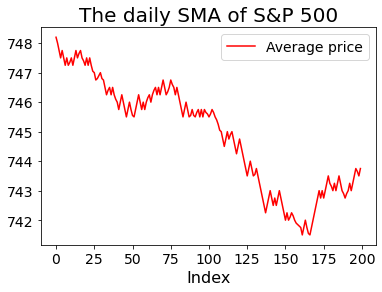

In [11]:

print(df['average_price'])


plt.plot(df.index,df["average_price"], color='red')


# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average price', '1 period SMA'], fontsize=14)

# title and labels
plt.title('The daily SMA of S&P 500', fontsize=20)
plt.xlabel('Index', fontsize=16)


0      748.20
1      748.00
2      747.75
3      747.50
4      747.75
        ...  
195    743.50
196    743.75
197    743.65
198    743.50
199    743.75
Name: average_price, Length: 200, dtype: float64


Text(0.5, 0, 'Index')

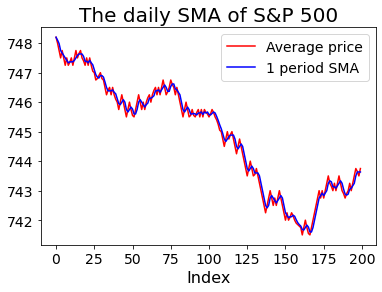

In [12]:
print(df['average_price'])


plt.plot(df.index,df["average_price"], color='red')
plt.plot(df.index,df["SMA"], color='blue')


# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average price', '1 period SMA'], fontsize=14)

# title and labels
plt.title('The daily SMA of S&P 500', fontsize=20)
plt.xlabel('Index', fontsize=16)

In [13]:
#computing logarithmic returns on the data set 
df['Log_Returns'] = np.log(df['price']) - np.log(df['price'].shift(1))
df.head()



,date,time,price,volume,average_price,SMA,Log_Returns
0,01/03/2000,08:30:34.000,1496.4,0,748.20,748.200000,NaN
1,01/03/2000,08:30:36.000,1496.0,0,748.00,748.100000,-0.000267
2,01/03/2000,08:30:37.000,1495.5,0,747.75,747.983333,-0.000334
3,01/03/2000,08:30:46.000,1495.0,0,747.50,747.750000,-0.000334
4,01/03/2000,08:30:53.000,1495.5,0,747.75,747.666667,0.000334


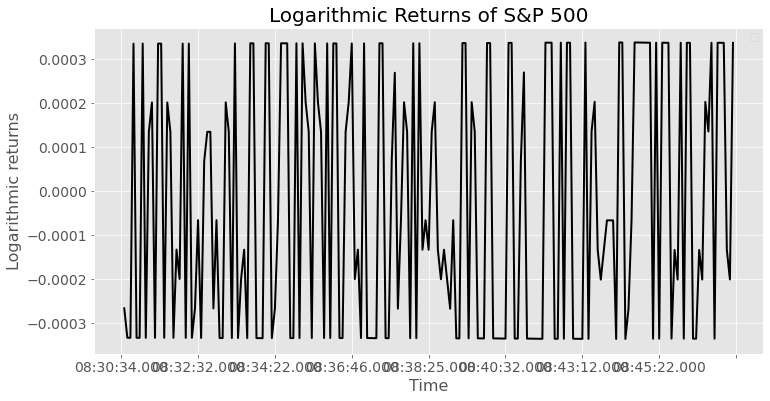

In [14]:
%matplotlib inline
plt.style.use('ggplot')
# plot of logarithmic returns
df.plot(x = "time", y = "Log_Returns", color='black', linewidth=2, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('Logarithmic Returns of S&P 500', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Logarithmic returns', fontsize=16)

plt.show()



In [15]:
# The volatility has been taken as:

volatility = df['Log_Returns'].std()
print(volatility)

0.0002900976105556674


Text(0.5, 1.0, 'S&P volatility: 0.03%')

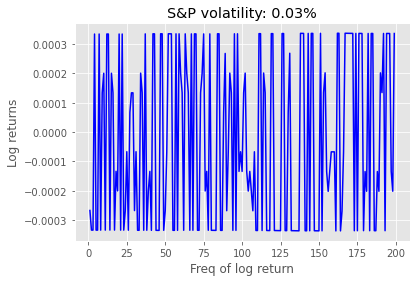

In [16]:
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
plt.plot(df.index,df['Log_Returns'] , color='blue')
ax.set_xlabel("Freq of log return")
ax.set_ylabel("Log returns")
ax.set_title("S&P volatility: "  + str_vol + "%")



In [17]:

#https://github.com/OmoyeniO/Entropy_For_Python/blob/master/pyentrp/entropy.py
def shannon_entropy(data_set):
    """Return the Shannon Entropy of the sample data.
    Args:
        time_series: Vector or string of the sample data
    Returns:
        The Shannon Entropy as float value
    """


    # Create a frequency data
    freq_list = []
    for entry in data_set:
        counter = 0.
        for i in data_set:
            if i == entry:
                counter += 1
        freq_list.append(float(counter) / len(data_set))

    # Shannon entropy
    ent = 0.0
    for freq in freq_list:
        ent += freq * np.log2(freq)
    ent = -ent
    return ent

In [18]:
average_price_entropy = shannon_entropy(df['average_price'])


Text(0.5, 1.0, 'S&P entropy: ')

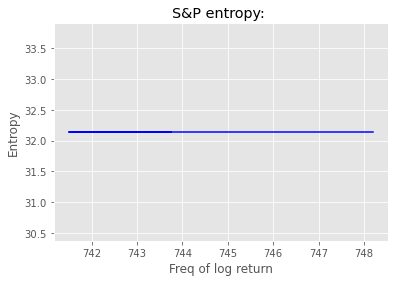

In [19]:


dt = [average_price_entropy] * len(df['average_price'])
dt
#print(dt)
fig, ax = plt.subplots()
plt.plot(df['average_price'] ,dt, color='blue')
ax.set_xlabel("Freq of log return")
ax.set_ylabel("Entropy")
ax.set_title("S&P entropy: ")

